# Business Problem

### As a real estate agency, our goal is to provide our clients estimates on the sale price of the house based on current market conditions. Also, to provide recommendations on improvements that can increase the selling price.

### For this project, the goal is to identify to identify minimum 2 coeffecients (factors) that will aid in increasing the value of a house

In [23]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### Using the `date` info to categorize seasons to check for possible seasonal differences in the sale prices.

In [3]:
#getting the month data first 
df['date'] = df['date'].astype('datetime64[ns]')
df['month_of_sale'] = df['date'].dt.month 

In [4]:
# creating a dict to convert the numeric value into month 
months  = {1 : 'January',
           2 : 'February',
           3 : 'March',
           4 : 'April',
           5 : 'May',
           6 : 'June',
           7 : 'July',
           8 : 'August',
           9 : 'September',
           10 : 'October',
           11 : 'November',
           12 : 'December'}

#applying it to the df
df['month_of_sale'] = df['month_of_sale'].map(months)

In [5]:
# defining seasons and adding to the df
seasons = {'March' : 'Spring',
          'April' : 'Spring',
          'May' : 'Spring',
          'June' : 'Summer',
          'July' : 'Summer',
          'August' : 'Summer',
          'September' : 'Autumn',
          'October' : 'Autumn',
          'November' : 'Autumn',
          'December' : 'Winter',
          'January' : 'Winter',
          'February' : 'Winter'}

#applying it to the df
df['season'] = df['month_of_sale'].map(seasons)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_sale,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,October,Autumn
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,February,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,December,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,February,Winter


### Removing some of the variables that are not useful for the analysis

In [7]:
#creating a copy of the df for the analysis
df1 = df.copy()

In [8]:
#listing out the columns to drop
drop = ['id','date','lat','long','sqft_living15','sqft_lot15']
df1.drop(drop,axis=1,inplace=True)

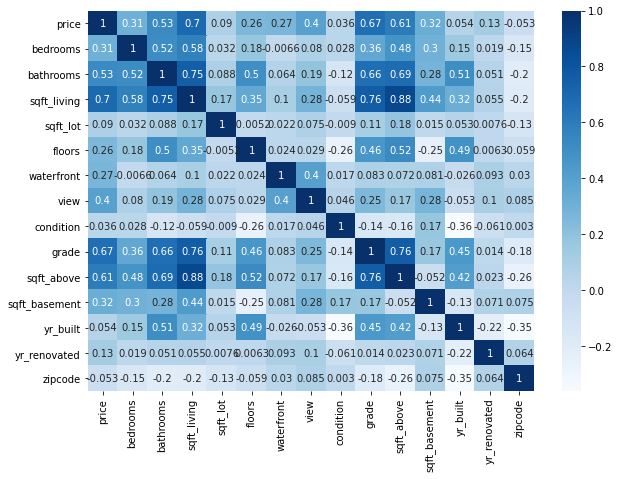

In [9]:
# looking at a heatmap to see which variables are most correlated with price
fix,ax = plt.subplots(figsize=(10,7))

import seaborn as sns
corr = df1.corr()
sns.heatmap(corr,cmap='Blues',ax=ax,annot=True);

### Since, `season` is of `object` data type, it needs to be converted into an integer to show up in the heat map. For this, we will employ `OneHotEncoder`.

In [10]:
# importing the relevant library
from sklearn.preprocessing import OneHotEncoder
seasons = df1[['season']]

#instantiate
encoder_seasons = OneHotEncoder(categories='auto',sparse=False,handle_unknown='ignore')

#fit it to the data
encoder_seasons.fit(seasons)

#inspecting the categories
encoder_seasons.categories_


[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [11]:
#transforming the data
seasons_encoded = encoder_seasons.transform(seasons)
seasons_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [12]:
#converting the encoded values into a df
seasons_encoded_df = pd.DataFrame(data=seasons_encoded,index=df1.index)
seasons_encoded_df.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [13]:
#renaming the columns to readability
seasons_encoded_df.rename(columns = {0:'Autumn',1:'Spring',2:'Summer',3:'Winter'},inplace=True)

In [14]:
# adding the encoded values to df1

df1 = pd.concat([df1,seasons_encoded_df],axis=1)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,month_of_sale,season,Autumn,Spring,Summer,Winter
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,October,Autumn,1.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,December,Winter,0.0,0.0,0.0,1.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,February,Winter,0.0,0.0,0.0,1.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,December,Winter,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,February,Winter,0.0,0.0,0.0,1.0


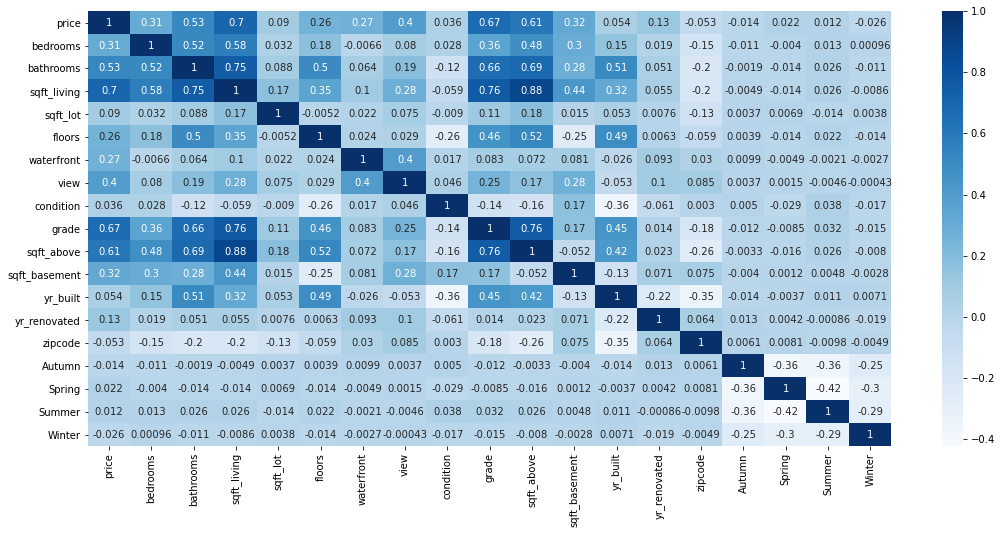

In [15]:
# looking at the updated heatmap
fig,ax = plt.subplots(figsize=(18,8))
corr = df1.corr()
sns.heatmap(corr,cmap='Blues',annot=True);

### From the map we can see that the following variables have correlation values > 0.5

- bathrooms
- sqft_living
- grade
- sqft_above

### Since, sqft_living has the highest correlation value of 0.7, we can use it to build our baseline model using 
`statsmodels`


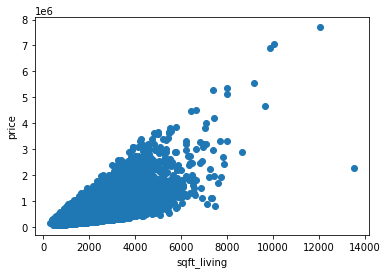

In [19]:
#checking if there is a linear relationship between price and sqft_living

fix,ax = plt.subplots()
ax.scatter(x=df1[['sqft_living']],y=df1[['price']]);
ax.set_xlabel('sqft_living');
ax.set_ylabel('price');

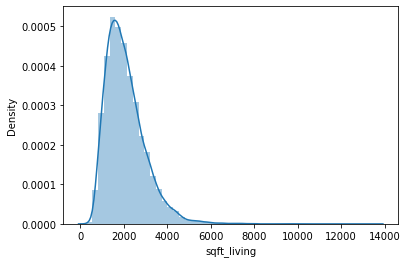

In [25]:
#checking to see if sqft_living is normally distributed
sns.distplot(df1['sqft_living']);

In [17]:
# importing the statsmodels library
from statsmodels.formula.api import ols

#defining the formula
f = 'price ~ sqft_living'

#building the model
model = ols(formula=f,data=df1).fit()

#getting the summary statistics of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:42:53   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# R2 value
print('R2 value of the baseline model is ',model.rsquared)

R2 value of the baseline model is  0.4933038644849773


#### Note: The high kurtosis values suggest the presence of large number of outliers

### Adding sqft_above to the model 

In [31]:
#defining the formula
f = 'price ~ sqft_living+sqft_above'

#building the model
model_1 = ols(formula=f,data=df1).fit()

#getting the summary statistics of the model
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.052e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:08:32   Log-Likelihood:            -3.0023e+05
No. Observations:               21611   AIC:                         6.005e+05
Df Residuals:                   21608   BIC:                         6.005e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.089e+04   4448.108     -9.193      0.000   -4.96e+04   -3.22e+04
sqft_living   295.6144      4.023     73.475      0.000     287.728     303.500
sqft_above    -18.9320      4.462     -4.243      0.000     -27.678     -10.186
==============================================================================
Omnibus:                    14789.794   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           543336.350
Skew:                           2.813   Prob(JB):                         0.00
Kurtosis:                      26.911   Cond. No.                     7.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
print('R2 value of the baseline model is ',model.rsquared )
print('R2 value of model_1 is ',model_1.rsquared)

R2 value of the baseline model is  0.4933038644849773
R2 value of model_1 is  0.4933038644849773


## We can see that the R2 values after adding `sqft_above` are exactly the same suggesting that `sqft_living`  and `sqft_above` are not independent

In [43]:
df1[['sqft_living','sqft_above']].corr()

,sqft_living,sqft_above
sqft_living,1.000000,0.876644
sqft_above,0.876644,1.000000
